In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score
)

In [2]:
#data = pd.read_csv("C:\\Users\\ozda2\\OneDrive\\שולחן העבודה\\שנה ג\\פרויקט גמר מדעי הנתונים\\career_change_prediction_dataset.csv")
data = pd.read_csv('C:\\Users\\HP\\Desktop\\career_change_prediction_dataset.csv')
data.head()

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,0,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,0,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,0,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,1,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,0,0,1,0,2,0,7,1


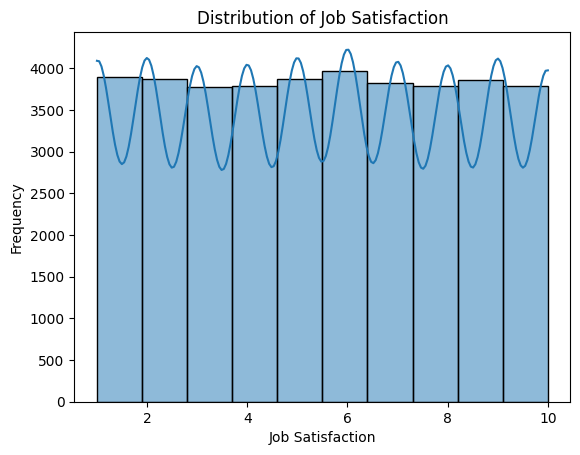

In [3]:
sns.histplot(data['Job Satisfaction'], kde=True, bins=10)
plt.title("Distribution of Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Frequency")
plt.show()



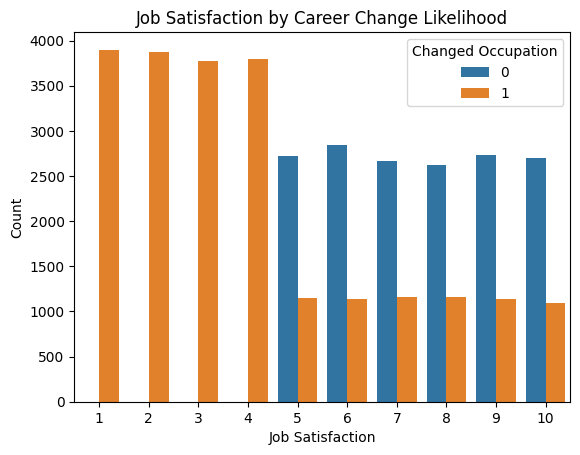

In [6]:
sns.countplot(x='Job Satisfaction', hue='Likely to Change Occupation', data=data)
plt.title("Job Satisfaction by Career Change Likelihood")
plt.xlabel("Job Satisfaction")
plt.ylabel("Count")
plt.legend(title="Changed Occupation")
plt.show()


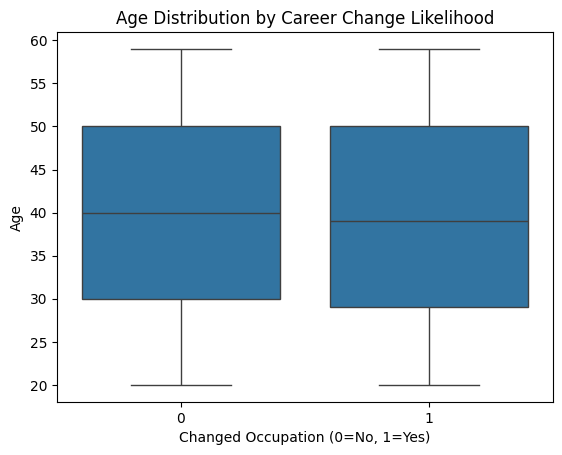

In [8]:
sns.boxplot(x='Likely to Change Occupation', y='Age', data=data)
plt.title("Age Distribution by Career Change Likelihood")
plt.xlabel("Changed Occupation (0=No, 1=Yes)")
plt.ylabel("Age")
plt.show()


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


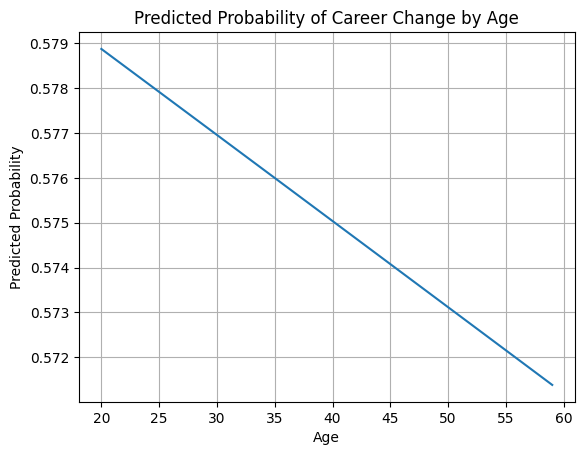

In [9]:
from sklearn.linear_model import LogisticRegression

X = data[['Age']]
y = data['Likely to Change Occupation']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# תחזית הסתברותית
age_range = np.linspace(data['Age'].min(), data['Age'].max(), 100).reshape(-1, 1)
probs = model.predict_proba(age_range)[:, 1]

plt.plot(age_range, probs)
plt.title("Predicted Probability of Career Change by Age")
plt.xlabel("Age")
plt.ylabel("Predicted Probability")
plt.grid(True)
plt.show()


ככל שהגיל עולה – ההסתברות לשינוי עיסוק יורדת בקצב קבוע ומתון.
עובדים צעירים (גיל 20–30) נוטים יותר לשנות עיסוק.

עובדים מבוגרים (50+) נשארים בתחום שלהם, אולי מתוך יציבות או קושי במעבר.

עם זאת, השפעת הגיל אינה דרמטית, כי ההפרש בהסתברות קטן יחסית (0.579 → 0.571).





c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


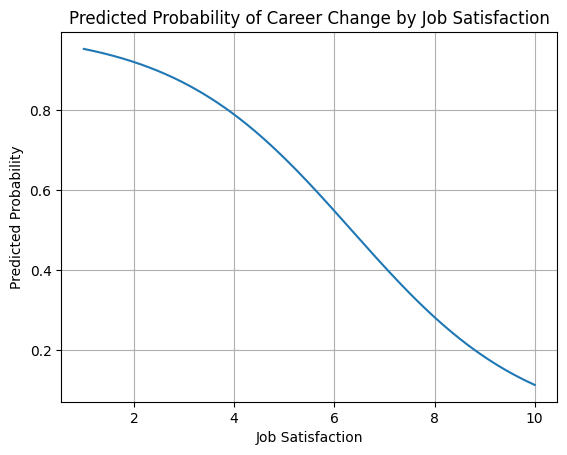

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# נבחר משתנה בודד: Job Satisfaction
X = data[['Job Satisfaction']]
y = data['Likely to Change Occupation']

# פיצול לנתוני אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# נירמול הנתונים
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# אימון מודל
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# חיזוי הסתברות בטווח שביעות רצון
satisfaction_range = np.linspace(data['Job Satisfaction'].min(), data['Job Satisfaction'].max(), 500).reshape(-1, 1)
satisfaction_scaled = scaler.transform(satisfaction_range)
probs = model.predict_proba(satisfaction_scaled)[:, 1]

# ציור גרף הסתברות
plt.plot(satisfaction_range, probs)
plt.title("Predicted Probability of Career Change by Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Predicted Probability")
plt.grid(True)
plt.show()


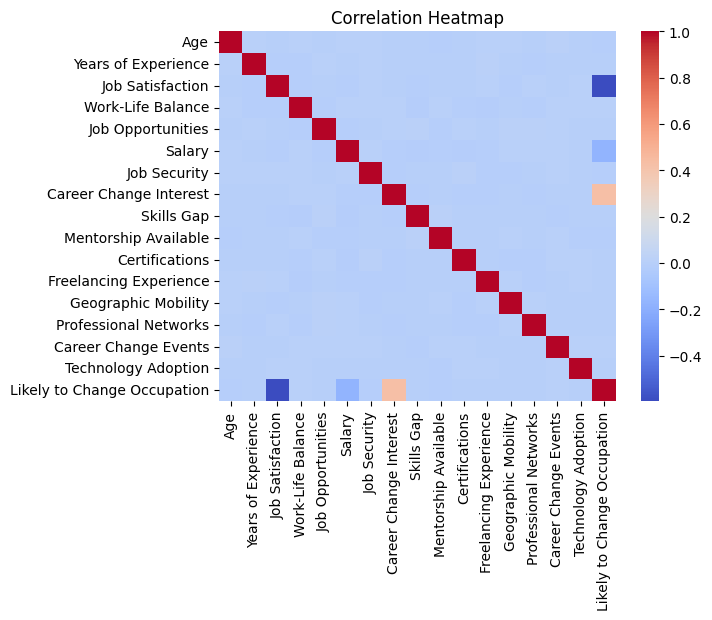

In [11]:
sns.heatmap(data.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


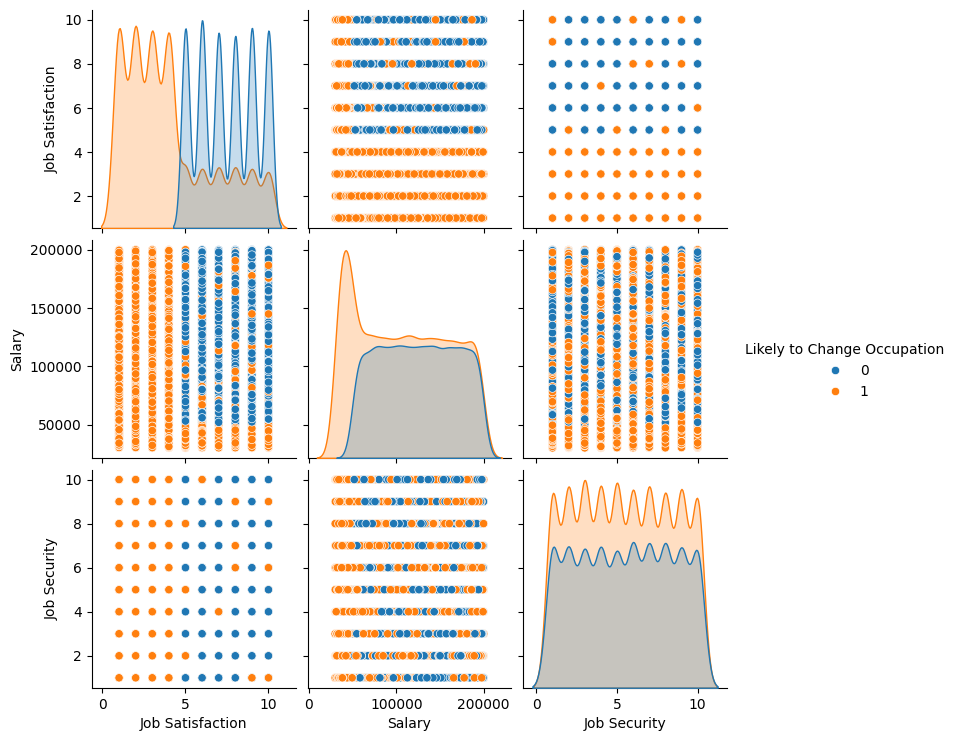

In [14]:
sns.pairplot(data[["Job Satisfaction", "Likely to Change Occupation", "Salary", "Job Security"]], hue="Likely to Change Occupation")
plt.show()


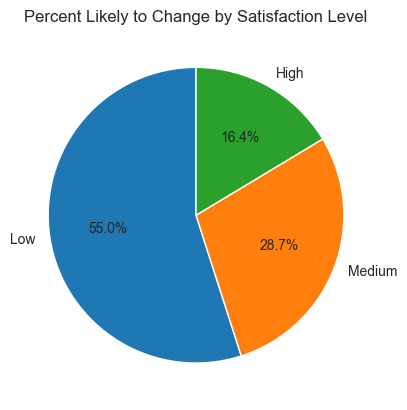

In [26]:
data['Satisfaction_Level'] = pd.cut(data['Job Satisfaction'], bins=[0, 3, 6, 10], labels=["Low", "Medium", "High"])
pie_data = data.groupby('Satisfaction_Level')['Likely to Change Occupation'].mean()
pie_data.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Percent Likely to Change by Satisfaction Level")
plt.ylabel("")
plt.show()


In [15]:
from scipy.stats import ttest_ind

group0 = data[data["Likely to Change Occupation"] == 0]["Job Satisfaction"]
group1 = data[data["Likely to Change Occupation"] == 1]["Job Satisfaction"]

stat, p = ttest_ind(group0, group1)
print("T-test p-value:", p)


T-test p-value: 0.0


 יש הבדל מובהק בין הקבוצות
 

In [16]:
data['Satisfaction_Group'] = pd.cut(
    data['Job Satisfaction'],
    bins=[0, 3, 6, 10],
    labels=[1, 2, 3]  # 1=Low, 2=Medium, 3=High
)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [20]:
# משתנים
X = data[["Job Satisfaction", "Age"]]
y = data["Likely to Change Occupation"]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [22]:
# סטנדרטיזציה
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:

# SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_test_scaled)
svm_proba = svm_model.predict_proba(X_test_scaled)[:, 1]


In [24]:
# Neural Network
nn_model = MLPClassifier(max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train)
nn_preds = nn_model.predict(X_test_scaled)
nn_proba = nn_model.predict_proba(X_test_scaled)[:, 1]


In [25]:
# מדדים
def print_results(name, y_true, y_pred, y_proba):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("AUC:", roc_auc_score(y_true, y_proba))
    print()

print_results("SVM", y_test, svm_preds, svm_proba)
print_results("Neural Network", y_test, nn_preds, nn_proba)


--- SVM ---
Accuracy: 0.8244321137506503
Precision: 1.0
Recall: 0.6956717763751127
AUC: 0.8531403057202128

--- Neural Network ---
Accuracy: 0.8244321137506503
Precision: 1.0
Recall: 0.6956717763751127
AUC: 0.8460978728436489



In [26]:
# 1. יצירת עמודת קבוצות שביעות רצון (1=Low, 2=Medium, 3=High)
bins = [0, 3, 6, 10]
labels = [1, 2, 3]
data["Satisfaction_Group"] = pd.cut(data["Job Satisfaction"], bins=bins, labels=labels).astype(int)


In [27]:
# 2. Pie chart: אחוזים ששינו קריירה בכל קבוצה
pie_data = data.groupby("Satisfaction_Group")["Likely to Change Occupation"].mean()
pie_data.index = ["Low", "Medium", "High"]

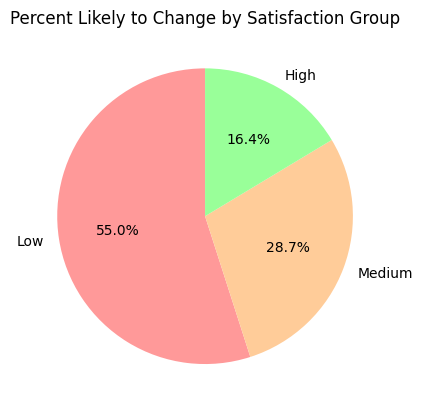

In [28]:
# גרף עוגה
pie_data.plot.pie(autopct="%1.1f%%", startangle=90, colors=["#FF9999", "#FFCC99", "#99FF99"])
plt.title("Percent Likely to Change by Satisfaction Group")
plt.ylabel("")
plt.show()

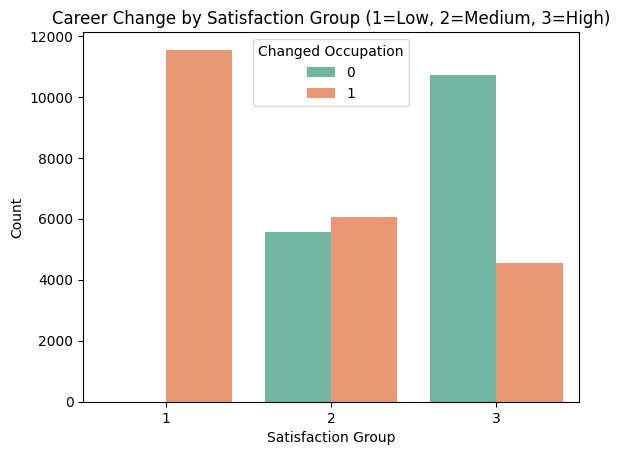

In [29]:
# 3. Countplot: מספר האנשים בכל קבוצה לפי שינוי קריירה
sns.countplot(x="Satisfaction_Group", hue="Likely to Change Occupation", data=data, palette="Set2")
plt.title("Career Change by Satisfaction Group (1=Low, 2=Medium, 3=High)")
plt.xlabel("Satisfaction Group")
plt.ylabel("Count")
plt.legend(title="Changed Occupation")
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


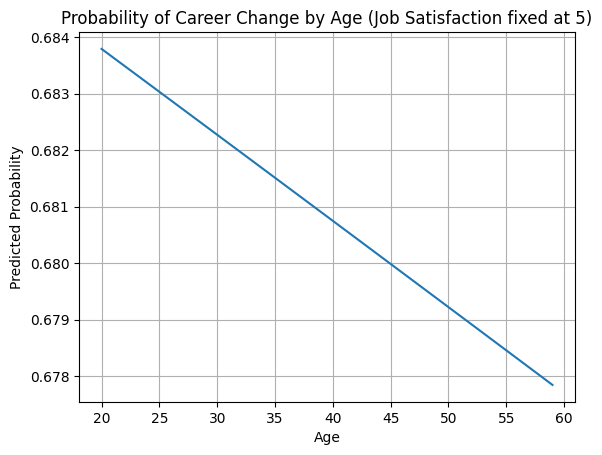

In [32]:
# הגדרת X עם שני משתנים
X = data[["Job Satisfaction", "Age"]]
y = data["Likely to Change Occupation"]

# פיצול וסטנדרטיזציה
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# אימון המודל עם 2 העמודות
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# יצירת טווח עבור משתנה בודד (למשל Age), והשארת Job Satisfaction קבוע (לצורך גרף)
import numpy as np
age_range = np.linspace(data["Age"].min(), data["Age"].max(), 100).reshape(-1, 1)

# נניח ש-Job Satisfaction קבוע על 5
satisfaction_fixed = np.full_like(age_range, 5)

# חיבור לשני משתנים
X_range = np.hstack((satisfaction_fixed, age_range))
X_range_scaled = scaler.transform(X_range)

# חיזוי הסתברויות
probs = model.predict_proba(X_range_scaled)[:, 1]

# ציור הגרף
import matplotlib.pyplot as plt
plt.plot(age_range, probs)
plt.title("Probability of Career Change by Age (Job Satisfaction fixed at 5)")
plt.xlabel("Age")
plt.ylabel("Predicted Probability")
plt.grid(True)
plt.show()


הקוד יוצר גרף שמבודד את ההשפעה של גיל כאשר שביעות רצון נשארת קבועה.

ככה אתה יכול לראות השפעה של כל משתנה בנפרד גם כשהמודל כולל כמה.